# 시계열 수치입력 수치예측 모델
- 코사인 데이터를 학습시킨 후, 코사인 데이터 예측

### 데이터셋 준비

In [1]:
import numpy as np
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

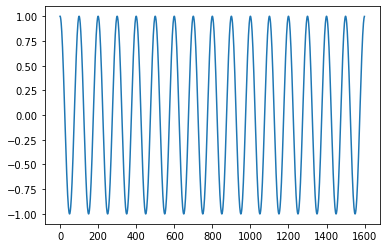

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [3]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

## 1. 다층 퍼셉트론 신경망 모델

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


### 모델 처리

In [7]:
model1 = Sequential()
model1.add(Dense(32, input_dim=40, activation='relu'))
model1.add(Dropout(0.3))
for i in range(2):
    model1.add(Dense(32, activation='relu'))
    model1.add(Dropout(0.3))
model1.add(Dense(1))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1312      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [9]:
model1.compile(loss='mean_squared_error', optimizer='adagrad')

In [10]:
hist1 = model1.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

W0910 17:55:32.764155  2408 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 3ms/step - loss: 0.2366 - val_loss: 0.0131
Epoch 2/200
760/760 [==============================] - 0s 73us/step - loss: 0.0738 - val_loss: 0.0159
Epoch 3/200
760/760 [==============================] - 0s 76us/step - loss: 0.0602 - val_loss: 0.0164
Epoch 4/200
760/760 [==============================] - 0s 76us/step - loss: 0.0486 - val_loss: 0.0101
Epoch 5/200
760/760 [==============================] - 0s 74us/step - loss: 0.0425 - val_loss: 0.0205
Epoch 6/200
760/760 [==============================] - 0s 71us/step - loss: 0.0360 - val_loss: 0.0139
Epoch 7/200
760/760 [==============================] - 0s 71us/step - loss: 0.0379 - val_loss: 0.0105
Epoch 8/200
760/760 [==============================] - 0s 69us/step - loss: 0.0397 - val_loss: 0.0097
Epoch 9/200
760/760 [==============================] - 0s 67us/step - loss: 0.0314 - val_loss: 0.0171
Epoch 10/200
760/760 [===============

760/760 [==============================] - 0s 65us/step - loss: 0.0127 - val_loss: 0.0087
Epoch 160/200
760/760 [==============================] - 0s 70us/step - loss: 0.0131 - val_loss: 0.0087
Epoch 161/200
760/760 [==============================] - 0s 71us/step - loss: 0.0128 - val_loss: 0.0099
Epoch 162/200
760/760 [==============================] - 0s 68us/step - loss: 0.0136 - val_loss: 0.0100
Epoch 163/200
760/760 [==============================] - 0s 68us/step - loss: 0.0133 - val_loss: 0.0080
Epoch 164/200
760/760 [==============================] - 0s 66us/step - loss: 0.0128 - val_loss: 0.0088
Epoch 165/200
760/760 [==============================] - 0s 68us/step - loss: 0.0138 - val_loss: 0.0085
Epoch 166/200
760/760 [==============================] - 0s 69us/step - loss: 0.0118 - val_loss: 0.0093
Epoch 167/200
760/760 [==============================] - 0s 63us/step - loss: 0.0119 - val_loss: 0.0083
Epoch 168/200
760/760 [==============================] - 0s 69us/step - loss: 

### 학습과정 살펴보기

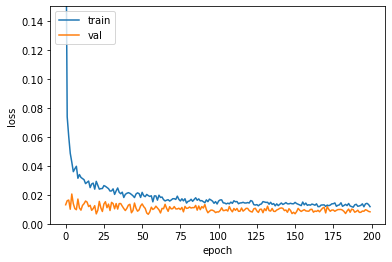

In [11]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [12]:
trainScore = model1.evaluate(x_train, y_train)
print('Train Score: ', trainScore)
valScore = model1.evaluate(x_val, y_val)
print('Validataion Score: ', valScore)
testScore = model1.evaluate(x_test, y_test)
print('Test Score: ', testScore)

760/760 [==============================] - 0s 46us/step
Train Score:  0.008341140407872828
360/360 [==============================] - 0s 41us/step
Validataion Score:  0.008276247108976046
360/360 [==============================] - 0s 45us/step
Test Score:  0.008276247108976046


### 모델 사용하기

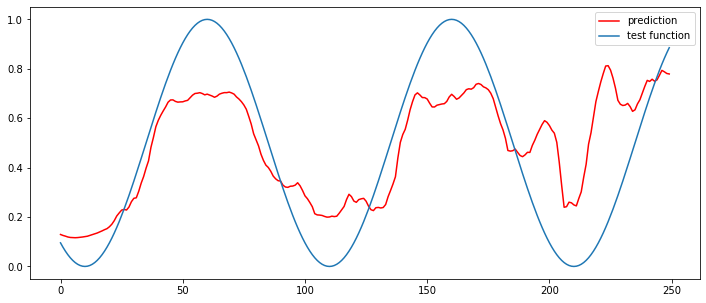

In [13]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model1.predict(xhat, batch_size=64)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 2. 순환신경망 모델

### 데이터셋 전처리

In [14]:
x_train.shape

(760, 40)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 모델 처리

In [16]:
model2 = Sequential()
model2.add(LSTM(32, input_shape=(None, 1)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
hist2 = model2.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

W0910 17:57:18.466183  2408 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 1s 2ms/step - loss: 0.1795 - val_loss: 0.0547
Epoch 2/200
760/760 [==============================] - 1s 971us/step - loss: 0.0458 - val_loss: 0.0268
Epoch 3/200
760/760 [==============================] - 1s 988us/step - loss: 0.0337 - val_loss: 0.0187
Epoch 4/200
760/760 [==============================] - 1s 998us/step - loss: 0.0287 - val_loss: 0.0146
Epoch 5/200
760/760 [==============================] - 1s 967us/step - loss: 0.0217 - val_loss: 0.0106
Epoch 6/200
760/760 [==============================] - 1s 991us/step - loss: 0.0198 - val_loss: 0.0084
Epoch 7/200
760/760 [==============================] - 1s 974us/step - loss: 0.0159 - val_loss: 0.0056
Epoch 8/200
760/760 [==============================] - 1s 966us/step - loss: 0.0127 - val_loss: 0.0039
Epoch 9/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0110 - val_loss: 0.0017
Epoch 10/200
760/760 [=========

Epoch 78/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 1.9556e-04
Epoch 79/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0037 - val_loss: 3.0654e-05
Epoch 80/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 3.5094e-04
Epoch 81/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 8.1752e-04
Epoch 82/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 3.9918e-04
Epoch 83/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 9.1669e-05
Epoch 84/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0042 - val_loss: 6.1134e-05
Epoch 85/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0038 - val_loss: 4.0233e-04
Epoch 86/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 4.4846e-05
Epoch 87/200
760/760 [========================

### 학습과정 살펴보기

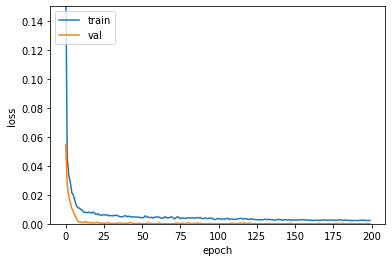

In [19]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [20]:
trainScore = model2.evaluate(x_train, y_train)
print('Train Score: ', trainScore)
valScore = model2.evaluate(x_val, y_val)
print('Validataion Score: ', valScore)
testScore = model2.evaluate(x_test, y_test)
print('Test Score: ', testScore)

760/760 [==============================] - 0s 409us/step
Train Score:  3.7838052144491625e-05
360/360 [==============================] - 0s 445us/step
Validataion Score:  3.7823015089897024e-05
360/360 [==============================] - 0s 444us/step
Test Score:  3.7823015089897024e-05


### 모델 사용하기

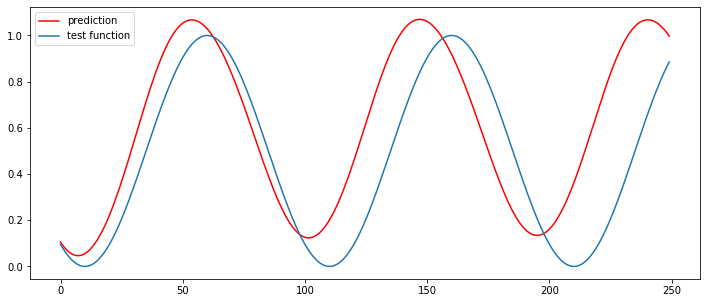

In [21]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model2.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 3. 상태유지 순환신경망 모델

In [7]:
import keras
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

### 모델 처리

In [23]:
model3 = Sequential()
model3.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model3.add(Dropout(0.3))
model3.add(Dense(1))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 32)                   4352      
_________________________________________________________________
dropout_8 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_10 (Dense)             (1, 1)                    33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [24]:
model3.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
hist3 = CustomHistory()
hist3.init()

for i in range(200):
    if i%10 == 0:
        print('*****' + str(i+1) + '-th iteration *****')
    model3.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
               validation_data=(x_val, y_val), callbacks=[hist3])
    model3.reset_states()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 59s 77ms/step - loss: 0.0325 - val_loss: 0.0096
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 83s 109ms/step - loss: 0.0101 - val_loss: 0.0028
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 101ms/step - loss: 0.0063 - val_loss: 5.3985e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 101ms/step - loss: 0.0053 - val_loss: 0.0020
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0046 - val_loss: 9.0984e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0040 - val_loss: 8.2962e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76

760/760 [==============================] - 76s 100ms/step - loss: 0.0017 - val_loss: 5.1147e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 2.0396e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0021 - val_loss: 6.2269e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 8.0694e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0021 - val_loss: 1.2827e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0021 - val_loss: 2.8141e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 1.9

760/760 [==============================] - 76s 100ms/step - loss: 0.0018 - val_loss: 8.5977e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0022 - val_loss: 1.3670e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 2.6085e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0022 - val_loss: 3.1854e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0019 - val_loss: 2.4083e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 5.5326e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0021 - val_loss: 3.2

760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 3.4462e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0023 - val_loss: 4.0015e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 2.6168e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 5.0911e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 2.2692e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 76s 100ms/step - loss: 0.0020 - val_loss: 9.5763e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 77s 101ms/step - loss: 0.0018 - val_loss: 3.3

### 학습과정 살펴보기

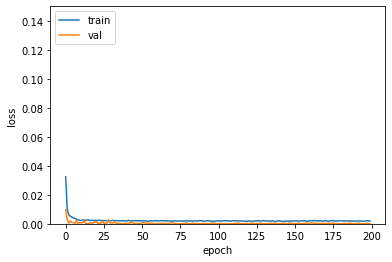

In [26]:
plt.plot(hist3.train_loss)
plt.plot(hist3.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [27]:
trainScore = model3.evaluate(x_train, y_train, batch_size=1)
model3.reset_states()
print('Train Score: ', trainScore)
valScore = model3.evaluate(x_val, y_val, batch_size=1)
model3.reset_states()
print('Validataion Score: ', valScore)
testScore = model3.evaluate(x_test, y_test, batch_size=1)
model3.reset_states()
print('Test Score: ', testScore)

760/760 [==============================] - 23s 30ms/step
Train Score:  0.00015333271480439013
360/360 [==============================] - 10s 28ms/step
Validataion Score:  0.00015217639883565603
360/360 [==============================] - 10s 29ms/step
Test Score:  0.00015217639883565603


### 모델 사용하기

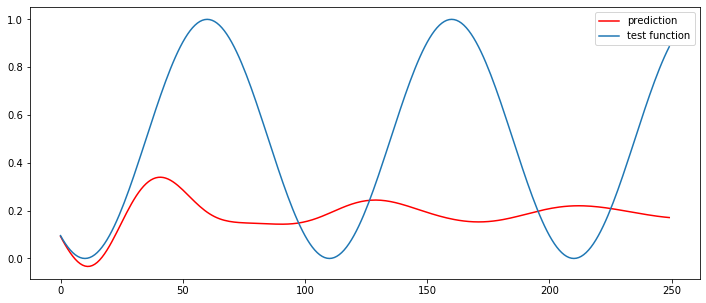

In [28]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model3.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

## 4. 상태유지 스택 순환신경망 모델

### 모델 처리

In [8]:
model4 = Sequential()
for i in range(2):
    model4.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model4.add(Dropout(0.3))
model4.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model4.add(Dropout(0.3))
model4.add(Dense(1))
model4.summary()

W0911 23:42:11.369900 11724 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 23:42:11.382832 11724 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 23:42:11.385824 11724 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0911 23:42:11.634160 11724 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0911 23:42:11.642139 11724 deprecation.py:506

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 40, 32)               4352      
_________________________________________________________________
dropout_1 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_2 (LSTM)                (1, 40, 32)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_3 (LSTM)                (1, 32)                   8320      
_________________________________________________________________
dropout_3 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_1 (Dense)              (1, 1)                   

In [10]:
model4.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
hist4 = CustomHistory()
hist4.init()

for i in range(50):    # 200
    if i%10 == 0:
        print('*****' + str(i+1) + '-th iteration *****')
    model4.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
               validation_data=(x_val, y_val), callbacks=[hist4])
    model4.reset_states()

*****1-th iteration *****


W0911 23:42:38.579922 11724 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0911 23:42:39.885667 11724 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 246s 324ms/step - loss: 0.0819 - val_loss: 0.0653
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 242s 319ms/step - loss: 0.0408 - val_loss: 0.0569
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 241s 317ms/step - loss: 0.0146 - val_loss: 0.0098
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 241s 318ms/step - loss: 0.0113 - val_loss: 0.0109
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 241s 317ms/step - loss: 0.0073 - val_loss: 0.0050
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 241s 317ms/step - loss: 0.0054 - val_loss: 0.0038
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 241s 31

### 학습과정 살펴보기

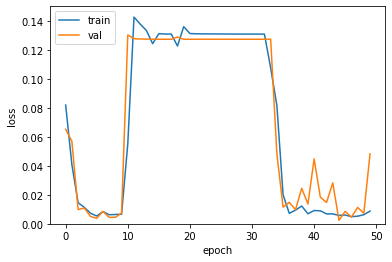

In [12]:
plt.plot(hist4.train_loss)
plt.plot(hist4.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 평가하기

In [13]:
trainScore = model4.evaluate(x_train, y_train, batch_size=1)
model4.reset_states()
print('Train Score: ', trainScore)
valScore = model4.evaluate(x_val, y_val, batch_size=1)
model4.reset_states()
print('Validataion Score: ', valScore)
testScore = model4.evaluate(x_test, y_test, batch_size=1)
model4.reset_states()
print('Test Score: ', testScore)

760/760 [==============================] - 59s 78ms/step
Train Score:  0.04799022967328327
360/360 [==============================] - 31s 85ms/step
Validataion Score:  0.047791405740938195
360/360 [==============================] - 28s 77ms/step
Test Score:  0.047791405740938195


### 모델 사용하기

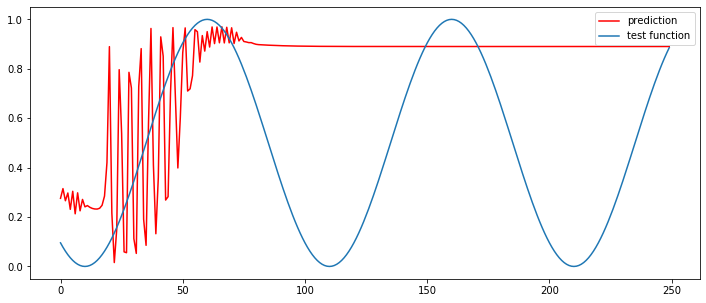

In [14]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model4.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()